# Problem statement
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

# loading necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from scipy.stats import zscore

# loading the dataset

In [129]:
dfins=pd.read_csv("insurance.csv")

In [40]:
#Setting option to show max rows and max columns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)

In [41]:
dfins.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,02-01-2015,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,13-01-2015,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,?,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,MALE,Associate,tech-support,base-jumping,unmarried,0,0,27-02-2015,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,3525 3rd Hwy,23,3,?,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,FEMALE,PhD,other-service,golf,own-child,0,0,30-01-2015,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,4872 Rock Ridge,21,1,NO,1,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,MALE,PhD,priv-house-serv,camping,wife,0,-39300,05-01-2015,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,3066 Francis Ave,14,1,NO,2,1,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [37]:
dfins["_c39"].unique()

array([nan])

In [42]:
dfins.shape

(1000, 40)

dataset contains 1000 rows and 40 columns

In [4]:
dfins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

there are no null values

In [7]:
dfins.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [34]:
lobject=['property_damage','policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_date','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','police_report_available','auto_make','auto_model','fraud_reported']

columns like policy_number, incident_location are irrelevant because all the values are unique

In [130]:
dfins.drop(['policy_number','incident_location','_c39'],axis=1,inplace=True)

In [131]:
dfins.dtypes

months_as_customer               int64
age                              int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage          

mix of int 64,float 64 and object datatypes

columns police_report_available,collision_type,property_damage contains ?, it needs to be replaced by most frequent

some columsn contain ?

# Simple Imputer

In [132]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values='?',strategy="most_frequent")

In [133]:
l=['police_report_available','collision_type','property_damage']
for i in l:
    dfins[i]=imp.fit_transform(dfins[i].values.reshape(-1,1))

In [134]:
dfins['police_report_available'].unique()

array(['YES', 'NO'], dtype=object)

In [135]:
dfins['collision_type'].unique()

array(['Side Collision', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [136]:
dfins['property_damage'].unique()

array(['YES', 'NO'], dtype=object)

# EDA

In [137]:
l=['property_damage','policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_date','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','property_damage','police_report_available','auto_make','auto_model','fraud_reported']

(array([0, 1]), [Text(0, 0, 'YES'), Text(1, 0, 'NO')])

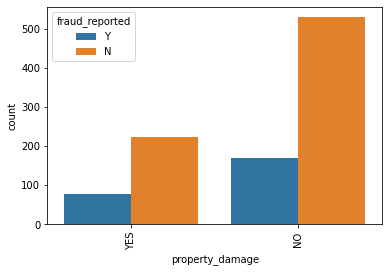

In [58]:
sns.countplot(dfins['property_damage'],hue=dfins['fraud_reported'])
plt.xticks(rotation=90)

(array([0, 1, 2]), [Text(0, 0, 'OH'), Text(1, 0, 'IN'), Text(2, 0, 'IL')])

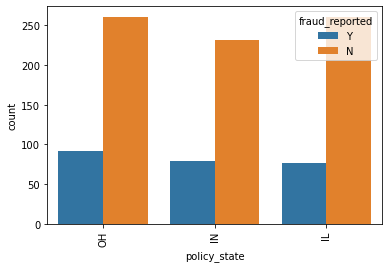

In [59]:
sns.countplot(dfins['policy_state'],hue=dfins['fraud_reported'])
plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, '250/500'), Text(1, 0, '100/300'), Text(2, 0, '500/1000')])

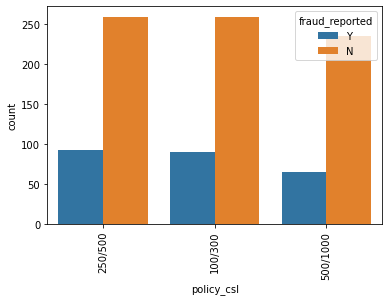

In [60]:
sns.countplot(dfins['policy_csl'],hue=dfins['fraud_reported'])
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'MALE'), Text(1, 0, 'FEMALE')])

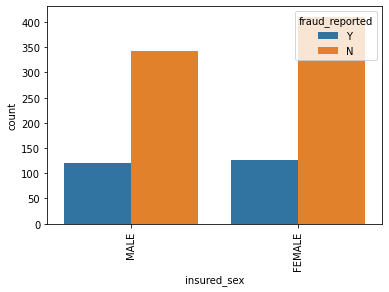

In [61]:
sns.countplot(dfins['insured_sex'],hue=dfins['fraud_reported'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'MD'),
  Text(1, 0, 'PhD'),
  Text(2, 0, 'Associate'),
  Text(3, 0, 'Masters'),
  Text(4, 0, 'High School'),
  Text(5, 0, 'College'),
  Text(6, 0, 'JD')])

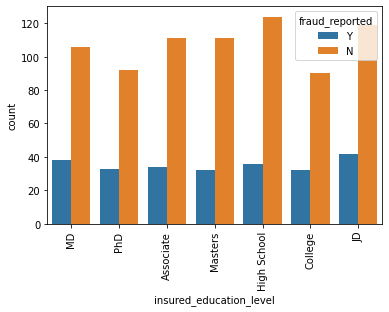

In [62]:
sns.countplot(dfins['insured_education_level'],hue=dfins['fraud_reported'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'craft-repair'),
  Text(1, 0, 'machine-op-inspct'),
  Text(2, 0, 'sales'),
  Text(3, 0, 'armed-forces'),
  Text(4, 0, 'tech-support'),
  Text(5, 0, 'prof-specialty'),
  Text(6, 0, 'other-service'),
  Text(7, 0, 'priv-house-serv'),
  Text(8, 0, 'exec-managerial'),
  Text(9, 0, 'protective-serv'),
  Text(10, 0, 'transport-moving'),
  Text(11, 0, 'handlers-cleaners'),
  Text(12, 0, 'adm-clerical'),
  Text(13, 0, 'farming-fishing')])

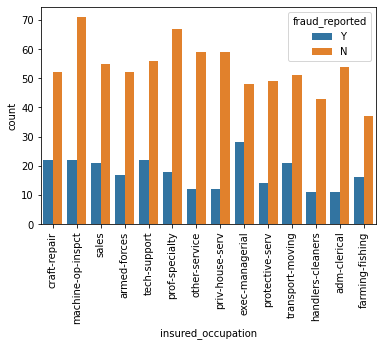

In [63]:
sns.countplot(dfins['insured_occupation'],hue=dfins['fraud_reported'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'sleeping'),
  Text(1, 0, 'reading'),
  Text(2, 0, 'board-games'),
  Text(3, 0, 'bungie-jumping'),
  Text(4, 0, 'base-jumping'),
  Text(5, 0, 'golf'),
  Text(6, 0, 'camping'),
  Text(7, 0, 'dancing'),
  Text(8, 0, 'skydiving'),
  Text(9, 0, 'movies'),
  Text(10, 0, 'hiking'),
  Text(11, 0, 'yachting'),
  Text(12, 0, 'paintball'),
  Text(13, 0, 'chess'),
  Text(14, 0, 'kayaking'),
  Text(15, 0, 'polo'),
  Text(16, 0, 'basketball'),
  Text(17, 0, 'video-games'),
  Text(18, 0, 'cross-fit'),
  Text(19, 0, 'exercise')])

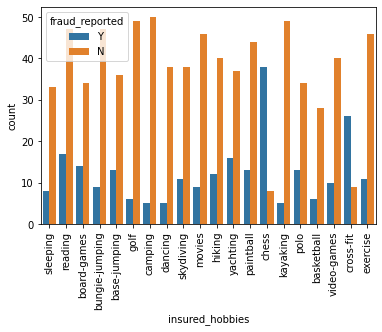

In [64]:
sns.countplot(dfins['insured_hobbies'],hue=dfins['fraud_reported'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'husband'),
  Text(1, 0, 'other-relative'),
  Text(2, 0, 'own-child'),
  Text(3, 0, 'unmarried'),
  Text(4, 0, 'wife'),
  Text(5, 0, 'not-in-family')])

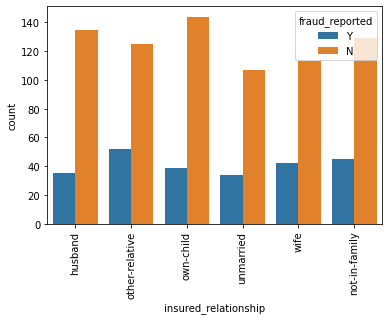

In [65]:
sns.countplot(dfins['insured_relationship'],hue=dfins['fraud_reported'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 [Text(0, 0, '25-01-2015'),
  Text(1, 0, '21-01-2015'),
  Text(2, 0, '22-02-2015'),
  Text(3, 0, '10-01-2015'),
  Text(4, 0, '17-02-2015'),
  Text(5, 0, '02-01-2015'),
  Text(6, 0, '13-01-2015'),
  Text(7, 0, '27-02-2015'),
  Text(8, 0, '30-01-2015'),
  Text(9, 0, '05-01-2015'),
  Text(10, 0, '06-01-2015'),
  Text(11, 0, '15-02-2015'),
  Text(12, 0, '22-01-2015'),
  Text(13, 0, '08-01-2015'),
  Text(14, 0, '15-01-2015'),
  Text(15, 0, '29-01-2015'),
  Text(16, 0, '19-01-2015'),
  Text(17, 0, '01-01-2015'),
  Text(18, 0, '10-02-2015'),
  Text(19, 0, '11-01-2015'),
  Text(20, 0, '24-02-2015'),
  Text(21, 0, '09-01-2015'),
  Text(22, 0, '28-01-2015'),
  Text(23, 0, '07-01-2015'),
  Text(24, 0, '18-01-2015'),
  Text(25, 

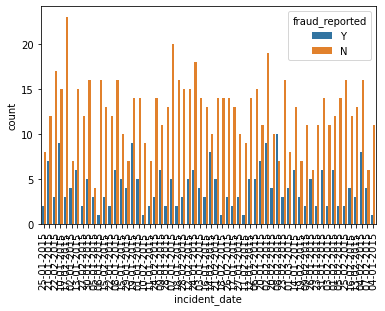

In [66]:
sns.countplot(dfins['incident_date'],hue=dfins['fraud_reported'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Single Vehicle Collision'),
  Text(1, 0, 'Vehicle Theft'),
  Text(2, 0, 'Multi-vehicle Collision'),
  Text(3, 0, 'Parked Car')])

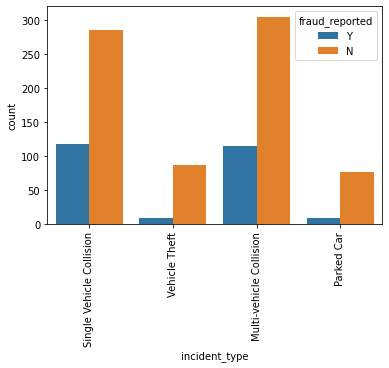

In [67]:
sns.countplot(dfins['incident_type'],hue=dfins['fraud_reported'])
plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, 'Side Collision'),
  Text(1, 0, 'Rear Collision'),
  Text(2, 0, 'Front Collision')])

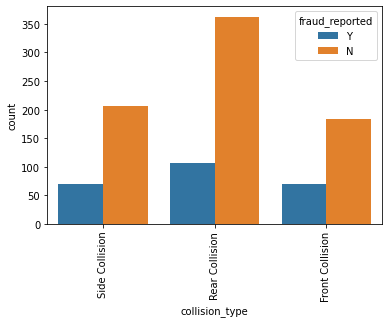

In [68]:
sns.countplot(dfins['collision_type'],hue=dfins['fraud_reported'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Major Damage'),
  Text(1, 0, 'Minor Damage'),
  Text(2, 0, 'Total Loss'),
  Text(3, 0, 'Trivial Damage')])

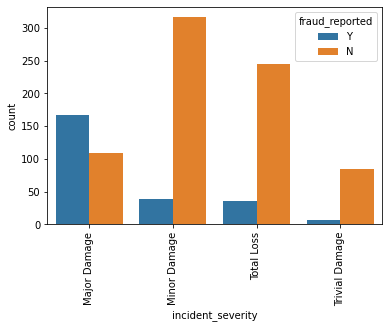

In [69]:
sns.countplot(dfins['incident_severity'],hue=dfins['fraud_reported'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Police'),
  Text(1, 0, 'None'),
  Text(2, 0, 'Fire'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Ambulance')])

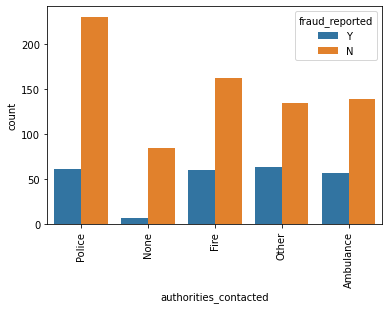

In [70]:
sns.countplot(dfins['authorities_contacted'],hue=dfins['fraud_reported'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'SC'),
  Text(1, 0, 'VA'),
  Text(2, 0, 'NY'),
  Text(3, 0, 'OH'),
  Text(4, 0, 'WV'),
  Text(5, 0, 'NC'),
  Text(6, 0, 'PA')])

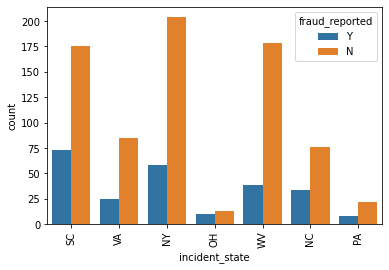

In [71]:
sns.countplot(dfins['incident_state'],hue=dfins['fraud_reported'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Columbus'),
  Text(1, 0, 'Riverwood'),
  Text(2, 0, 'Arlington'),
  Text(3, 0, 'Springfield'),
  Text(4, 0, 'Hillsdale'),
  Text(5, 0, 'Northbend'),
  Text(6, 0, 'Northbrook')])

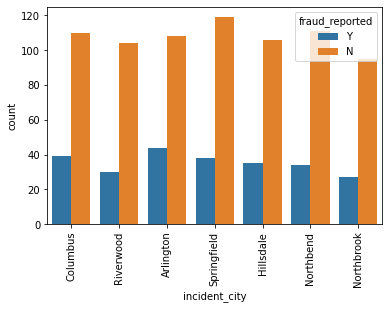

In [72]:
sns.countplot(dfins['incident_city'],hue=dfins['fraud_reported'])
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'YES'), Text(1, 0, 'NO')])

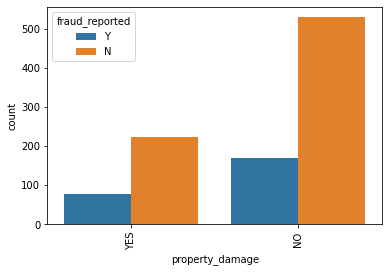

In [73]:
sns.countplot(dfins['property_damage'],hue=dfins['fraud_reported'])
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'YES'), Text(1, 0, 'NO')])

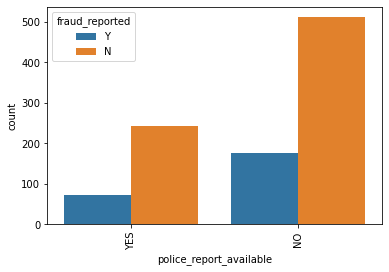

In [74]:
sns.countplot(dfins['police_report_available'],hue=dfins['fraud_reported'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Saab'),
  Text(1, 0, 'Mercedes'),
  Text(2, 0, 'Dodge'),
  Text(3, 0, 'Chevrolet'),
  Text(4, 0, 'Accura'),
  Text(5, 0, 'Nissan'),
  Text(6, 0, 'Audi'),
  Text(7, 0, 'Toyota'),
  Text(8, 0, 'Ford'),
  Text(9, 0, 'Suburu'),
  Text(10, 0, 'BMW'),
  Text(11, 0, 'Jeep'),
  Text(12, 0, 'Honda'),
  Text(13, 0, 'Volkswagen')])

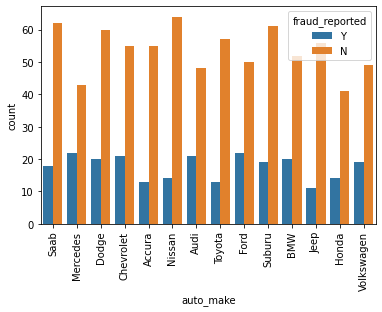

In [75]:
sns.countplot(dfins['auto_make'],hue=dfins['fraud_reported'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '92x'),
  Text(1, 0, 'E400'),
  Text(2, 0, 'RAM'),
  Text(3, 0, 'Tahoe'),
  Text(4, 0, 'RSX'),
  Text(5, 0, '95'),
  Text(6, 0, 'Pathfinder'),
  Text(7, 0, 'A5'),
  Text(8, 0, 'Camry'),
  Text(9, 0, 'F150'),
  Text(10, 0, 'A3'),
  Text(11, 0, 'Highlander'),
  Text(12, 0, 'Neon'),
  Text(13, 0, 'MDX'),
  Text(14, 0, 'Maxima'),
  Text(15, 0, 'Legacy'),
  Text(16, 0, 'TL'),
  Text(17, 0, 'Impreza'),
  Text(18, 0, 'Forrestor'),
  Text(19, 0, 'Escape'),
  Text(20, 0, 'Corolla'),
  Text(21, 0, '3 Series'),
  Text(22, 0, 'C300'),
  Text(23, 0, 'Wrangler'),
  Text(24, 0, 'M5'),
  Text(25, 0, 'X5'),
  Text(26, 0, 'Civic'),
  Text(27, 0, 'Passat'),
  Text(28, 0, 'Silverado'),
  Text(29, 0, 'CRV'),
  Text(30, 0, '93'),
  Text(31, 0, 'Accord'),
  Text(32, 0, 'X6'),
  Text(33, 0, 'Malibu'),
  Text(34, 0, 'F

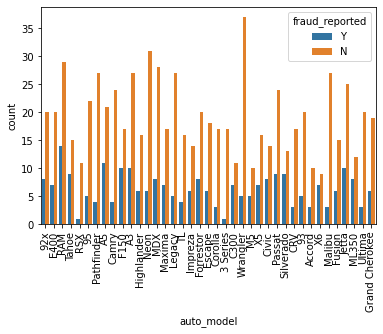

In [76]:
sns.countplot(dfins['auto_model'],hue=dfins['fraud_reported'])
plt.xticks(rotation=90)

# visualisation for continuous data

In [78]:
dfins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

<AxesSubplot:xlabel='fraud_reported', ylabel='months_as_customer'>

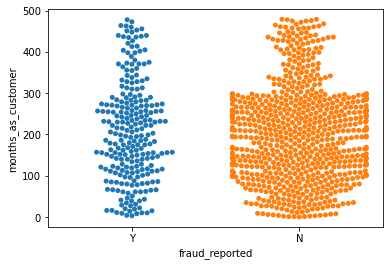

In [79]:
sns.swarmplot(x="fraud_reported", y="months_as_customer", data=dfins)

<AxesSubplot:xlabel='fraud_reported', ylabel='age'>

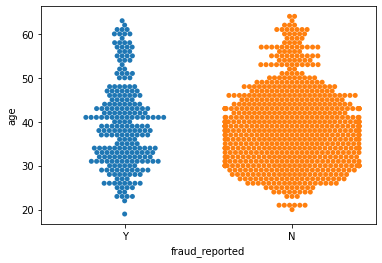

In [80]:
sns.swarmplot(x="fraud_reported", y="age", data=dfins)

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_deductable'>

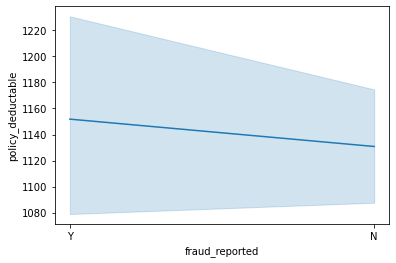

In [82]:
sns.lineplot(x="fraud_reported", y="policy_deductable", data=dfins)

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_annual_premium'>

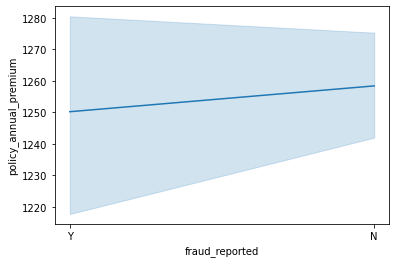

In [83]:
sns.lineplot(x="fraud_reported", y="policy_annual_premium", data=dfins)

<AxesSubplot:xlabel='fraud_reported', ylabel='umbrella_limit'>

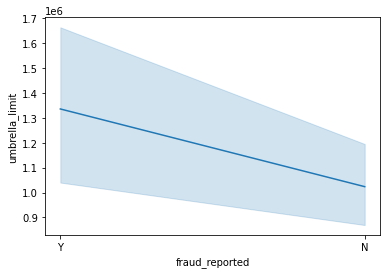

In [85]:
sns.lineplot(x="fraud_reported", y="umbrella_limit", data=dfins)

<AxesSubplot:xlabel='fraud_reported', ylabel='insured_zip'>

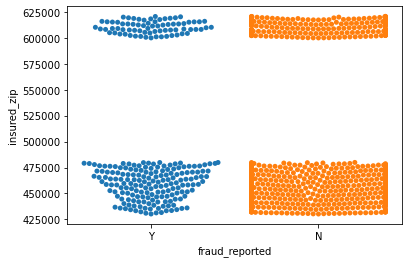

In [86]:
sns.swarmplot(x="fraud_reported", y="insured_zip", data=dfins)

<AxesSubplot:xlabel='fraud_reported', ylabel='capital-gains'>

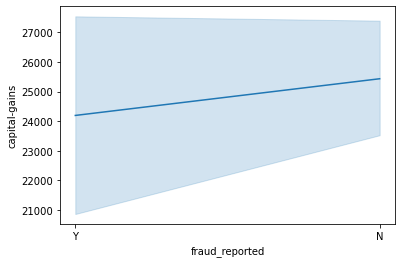

In [88]:
sns.lineplot(x="fraud_reported", y="capital-gains", data=dfins)

<AxesSubplot:xlabel='fraud_reported', ylabel='capital-loss'>

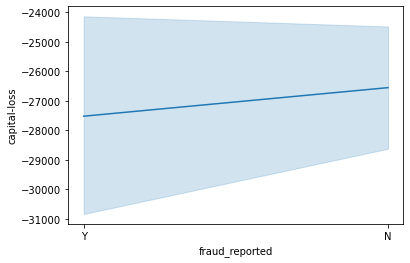

In [89]:
sns.lineplot(x="fraud_reported", y="capital-loss", data=dfins)

<AxesSubplot:xlabel='fraud_reported', ylabel='incident_hour_of_the_day'>

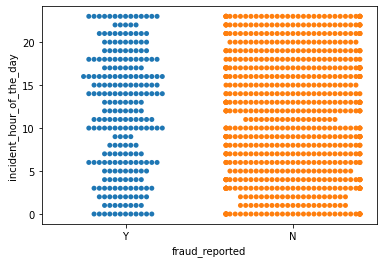

In [90]:
sns.swarmplot(x="fraud_reported", y="incident_hour_of_the_day", data=dfins)

<AxesSubplot:xlabel='fraud_reported', ylabel='number_of_vehicles_involved'>

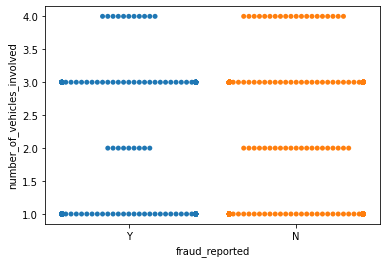

In [91]:
sns.swarmplot(x="fraud_reported", y="number_of_vehicles_involved", data=dfins)

<AxesSubplot:xlabel='fraud_reported', ylabel='witnesses'>

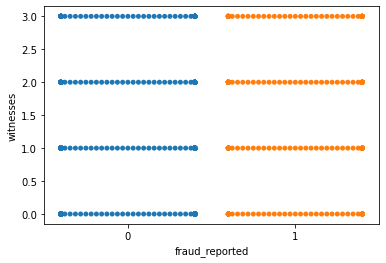

In [196]:
sns.swarmplot(x="fraud_reported", y="witnesses", data=dfins)

<AxesSubplot:xlabel='fraud_reported', ylabel='vehicle_claim'>

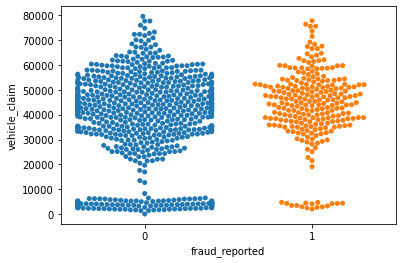

In [200]:
sns.swarmplot(x="fraud_reported", y="vehicle_claim", data=dfins)

# Label encoding

In [138]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [139]:
lobject=['property_damage','policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_date','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','police_report_available','auto_make','auto_model','fraud_reported']
for i in lobject:
    dfins[i]=le.fit_transform(dfins[i])

In [140]:
dfins["policy_bind_date"]=le.fit_transform(dfins["policy_bind_date"])

In [141]:
dfins.dtypes

months_as_customer               int64
age                              int64
policy_bind_date                 int32
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_date                    int32
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage          

the object type has been converted to int type

# Descriptive statistics

In [142]:
dfins.describe()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,474.332000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,2.966000,6.653000,9.731000,2.416000,25126.100000,-26793.700000,29.376000,1.172000,1.022000,1.184000,2.167000,3.242000,2.966000,11.644000,1.83900,0.302000,0.992000,1.487000,0.314000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,275.402851,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,1.948497,4.019048,5.674049,1.681003,27872.187708,28104.096686,17.249875,1.081474,0.728043,0.939695,1.532142,2.155942,2.044266,6.951373,1.01888,0.459355,0.820127,1.111335,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,0.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-111100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,233.750000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,1.000000,3.000000,5.000000,1.000000,0.000000,-51500.000000,14.750000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,6.000000,1.00000,0.000000,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,472.500000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,3.000000,7.000000,10.000000,2.000000,0.000000,-23250.000000,29.500000,1.000000,1.000000,1.000000,2.000000,4.000000,3.000000,12.000000,1.00000,0.000000,1.000000,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,713.250000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,5.000000,10.000000,15.000000,4.000000,51025.000000,0.000000,44.000000,2.000000,2.000000,2.000000,4.000000,5.000000,5.000000,17.000000,3.00000,1.000000,2.000000,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,950.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,6.000000,13.000000,19.000000,5.000000,100500.000000,0.000000,59.000000,3.000000,2.000000,3.000000,4.000000,6.000000,6.000000,23.000000,4.00000,1.000000,2.000000,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


skewness is present in multiple columns and it can be identified from difference between 75th percentile and max

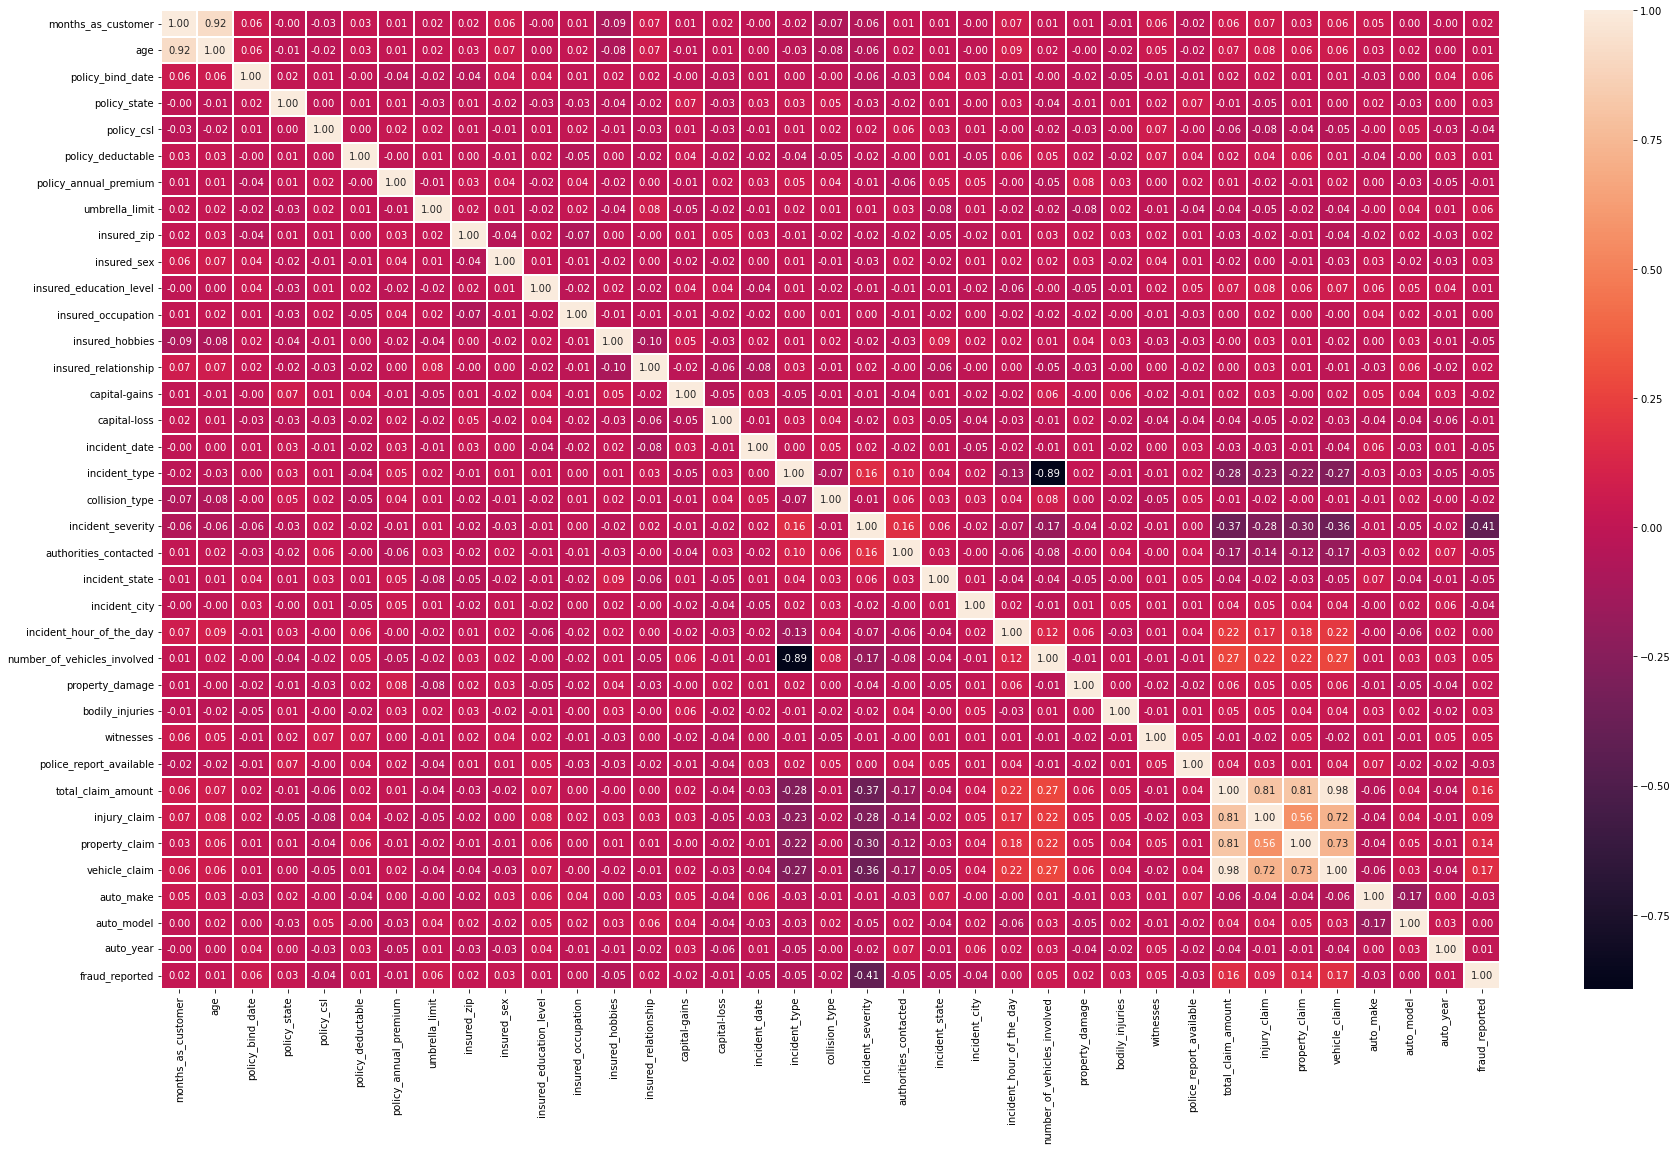

In [143]:
plt.figure(figsize=(30,18))
sns.heatmap(dfins.corr(),linewidth=0.2,annot=True,fmt="0.2f")
plt.show()

In [144]:
dfins.corr()["fraud_reported"].sort_values()

incident_severity             -0.405988
incident_state                -0.051407
incident_type                 -0.050376
incident_date                 -0.047726
insured_hobbies               -0.046838
authorities_contacted         -0.045802
incident_city                 -0.040403
policy_csl                    -0.037190
police_report_available       -0.027768
auto_make                     -0.027519
capital-gains                 -0.019173
collision_type                -0.017315
capital-loss                  -0.014863
policy_annual_premium         -0.014480
auto_model                     0.000720
insured_occupation             0.001564
incident_hour_of_the_day       0.004316
auto_year                      0.007928
insured_education_level        0.008808
age                            0.012143
policy_deductable              0.014817
property_damage                0.017202
insured_zip                    0.019368
months_as_customer             0.020544
insured_relationship           0.021043


some columns like auto_model, insured_occupation, incident_hour_of_the_day, auto_year has very less correlation with target variable so we can drop it

In [145]:
dfins.drop(["auto_model","insured_occupation","auto_year"],axis=1,inplace=True)

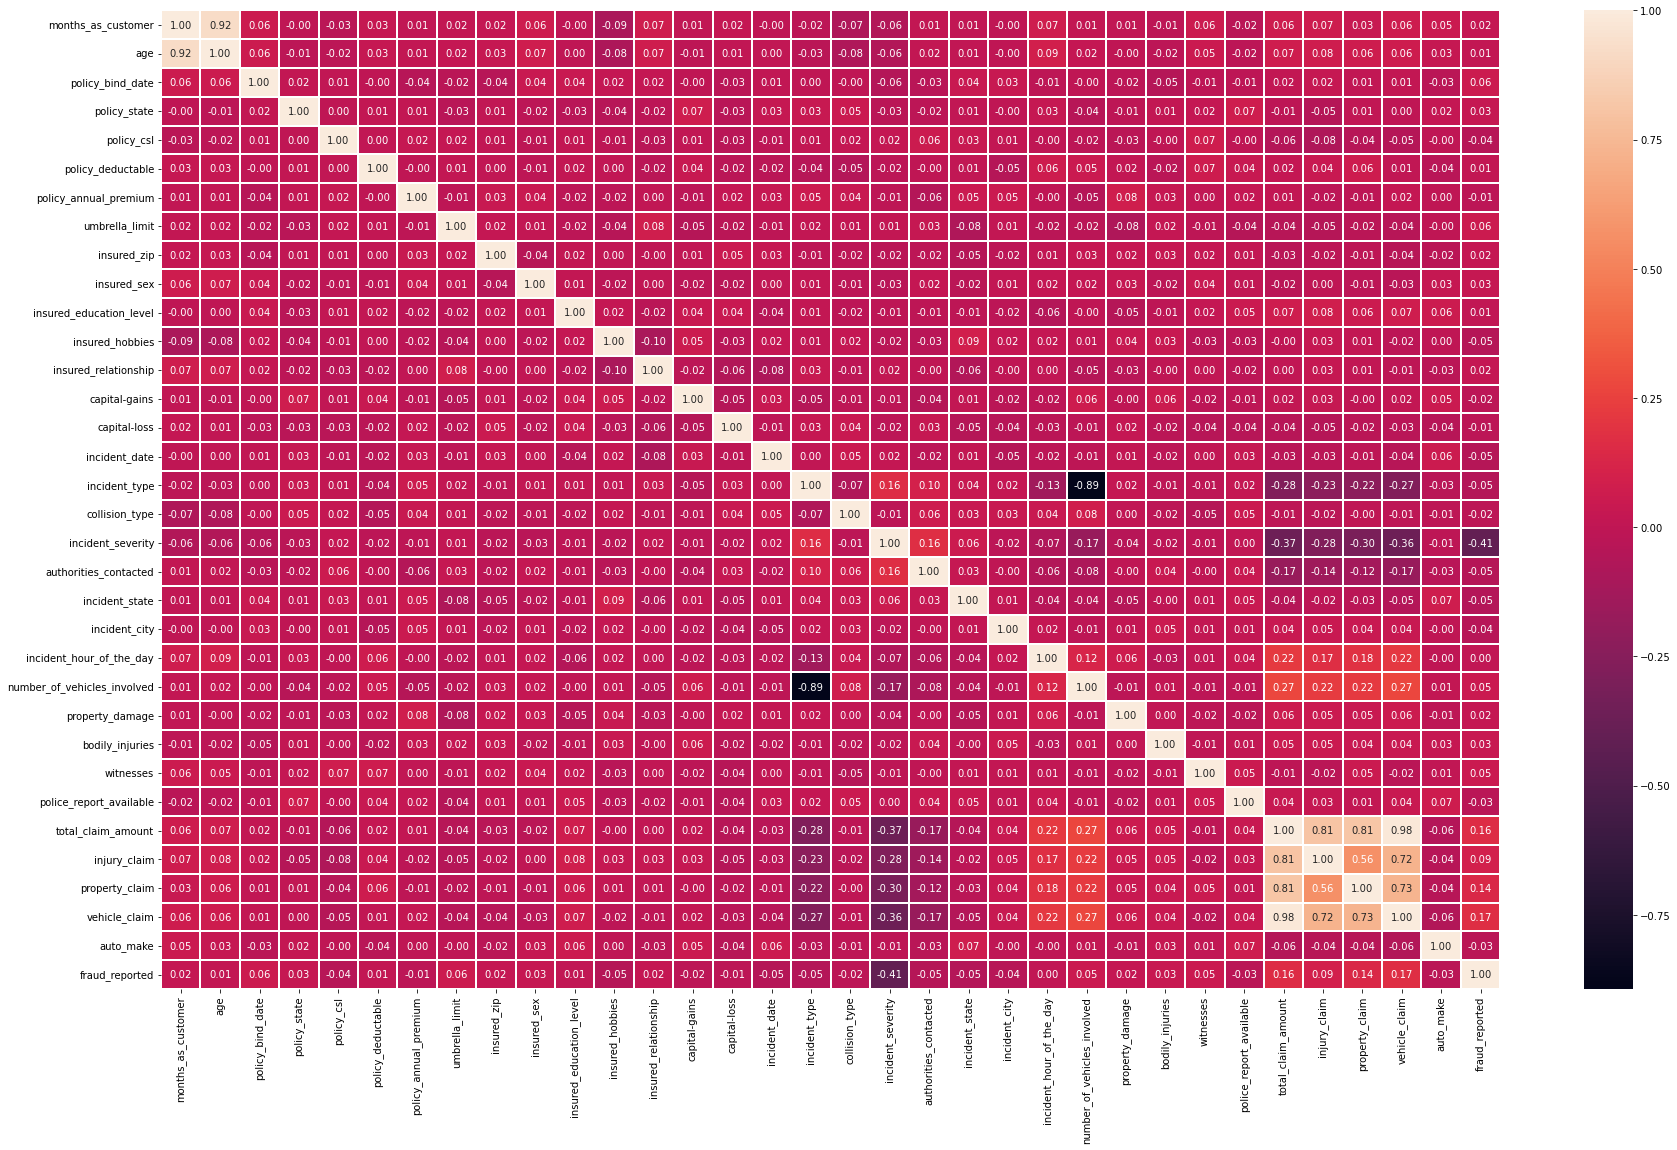

In [146]:
plt.figure(figsize=(30,18))
sns.heatmap(dfins.corr(),linewidth=0.2,annot=True,fmt="0.2f")
plt.show()

multicollinearity is present

In [148]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [149]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["Variables"]=x1.columns
    vif["VIF factor"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return (vif)

In [150]:
x=dfins.drop(["fraud_reported"],axis=1)
y=dfins["fraud_reported"]

In [151]:
calc_vif(x)

,Variables,VIF factor
0,months_as_customer,24.183042
1,age,104.391522
2,policy_bind_date,3.980532
3,policy_state,2.545056
4,policy_csl,2.443914
5,policy_deductable,4.535504
6,policy_annual_premium,25.699260
7,umbrella_limit,1.265494
8,insured_zip,39.606489
9,insured_sex,1.910079


for removal of multicollinearity, we will drop columns age, injury_claim,property_claim,total_claim_amount

In [152]:
dfins.drop(["age","injury_claim","property_claim","total_claim_amount"],axis=1,inplace=True)

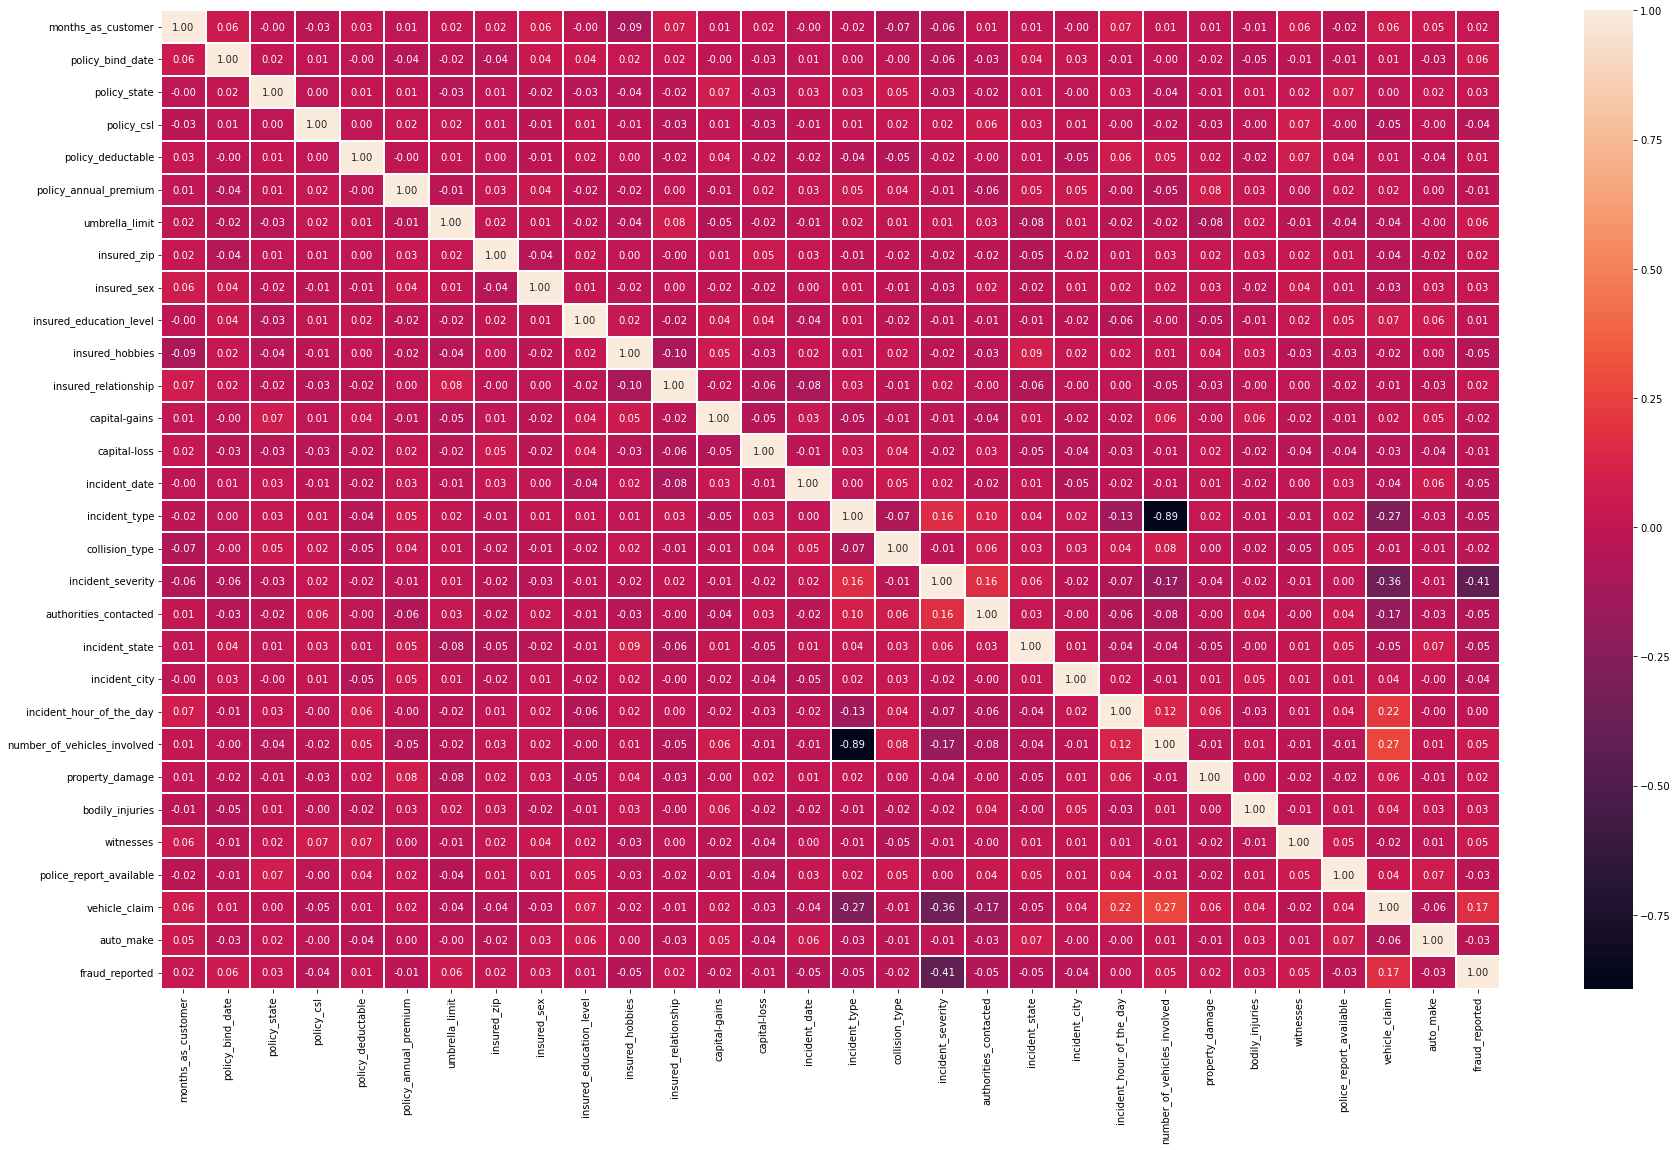

In [153]:
plt.figure(figsize=(30,18))
sns.heatmap(dfins.corr(),linewidth=0.2,annot=True,fmt="0.2f")
plt.show()

#  outliers check

In [154]:
from scipy.stats import zscore
z=np.abs(zscore(dfins))

In [155]:
np.where(z>3)

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 503, 657,
        700, 763, 807, 875, 922, 975], dtype=int64),
 array([ 6,  6,  6,  6,  6,  5,  5,  6,  6,  6,  6,  6,  6,  6,  5, 13,  6,
         6,  6], dtype=int64))

In [156]:
dfnew=dfins[(z<3).all(axis=1)]

In [157]:
dfnew.shape

(981, 30)

% data loss=(1000-981)/1000 * 100= 1.9%

# skewness of data

In [158]:
dfnew.skew().sort_values()

vehicle_claim                 -0.622470
capital-loss                  -0.378586
incident_state                -0.150334
authorities_contacted         -0.115766
insured_hobbies               -0.063050
incident_hour_of_the_day      -0.040633
policy_state                  -0.040033
collision_type                -0.034340
auto_make                     -0.028323
bodily_injuries                0.001877
incident_date                  0.002752
policy_bind_date               0.004344
insured_education_level        0.006225
witnesses                      0.024567
policy_annual_premium          0.036211
incident_city                  0.042484
insured_relationship           0.079116
incident_type                  0.088647
policy_csl                     0.096323
insured_sex                    0.141238
incident_severity              0.278443
months_as_customer             0.360876
capital-gains                  0.464155
policy_deductable              0.477577
number_of_vehicles_involved    0.511409


SKEWNESS IS PRESENT IN SOME COLUMNS

In [159]:
from sklearn.preprocessing import power_transform


In [160]:
x=dfnew.drop(["fraud_reported"],axis=1)
y=dfnew["fraud_reported"]

In [161]:
x=power_transform(x,method='yeo-johnson')

In [162]:
dfnew.skew().sort_values()

vehicle_claim                 -0.622470
capital-loss                  -0.378586
incident_state                -0.150334
authorities_contacted         -0.115766
insured_hobbies               -0.063050
incident_hour_of_the_day      -0.040633
policy_state                  -0.040033
collision_type                -0.034340
auto_make                     -0.028323
bodily_injuries                0.001877
incident_date                  0.002752
policy_bind_date               0.004344
insured_education_level        0.006225
witnesses                      0.024567
policy_annual_premium          0.036211
incident_city                  0.042484
insured_relationship           0.079116
incident_type                  0.088647
policy_csl                     0.096323
insured_sex                    0.141238
incident_severity              0.278443
months_as_customer             0.360876
capital-gains                  0.464155
policy_deductable              0.477577
number_of_vehicles_involved    0.511409


# scaling of data

In [163]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [164]:
dfx=sc.fit_transform(x)

In [165]:
dfx.mean()

6.11912440722783e-18

# splitting of train and test data

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import cross_val_score

In [167]:
def model_selection(instance):
    maxacc=0
    rs=0
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=i,test_size=0.30)
        instance.fit(x_train,y_train)
        pred_train=instance.predict(x_train)
        pred_test=instance.predict(x_test)
        if((accuracy_score(y_test,pred_test))>maxacc):
            maxacc=accuracy_score(y_test,pred_test)
            rs=i
        print(f"at random state {i},  accuracy score is {accuracy_score(y_test,pred_test)}")
        print(f"at random state {i}, confusion matrix is {confusion_matrix(y_test,pred_test)}")
        print(f"at random state {i}, classification report is {classification_report(y_test,pred_test)}")
        print("\n")
    print("Max accuracy at random state",rs, "=",maxacc)
   

# KNeighbors Classifier

In [168]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
model_selection(knn)

at random state 0,  accuracy score is 0.6847457627118644
at random state 0, confusion matrix is [[193  21]
 [ 72   9]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.73      0.90      0.81       214
           1       0.30      0.11      0.16        81

    accuracy                           0.68       295
   macro avg       0.51      0.51      0.48       295
weighted avg       0.61      0.68      0.63       295



at random state 1,  accuracy score is 0.735593220338983
at random state 1, confusion matrix is [[207  18]
 [ 60  10]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.78      0.92      0.84       225
           1       0.36      0.14      0.20        70

    accuracy                           0.74       295
   macro avg       0.57      0.53      0.52       295
weighted avg       0.68      0.74      0.69       295



at random state 2

at random state 17,  accuracy score is 0.7423728813559322
at random state 17, confusion matrix is [[207  18]
 [ 58  12]]
at random state 17, classification report is               precision    recall  f1-score   support

           0       0.78      0.92      0.84       225
           1       0.40      0.17      0.24        70

    accuracy                           0.74       295
   macro avg       0.59      0.55      0.54       295
weighted avg       0.69      0.74      0.70       295



at random state 18,  accuracy score is 0.7457627118644068
at random state 18, confusion matrix is [[210  27]
 [ 48  10]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       0.81      0.89      0.85       237
           1       0.27      0.17      0.21        58

    accuracy                           0.75       295
   macro avg       0.54      0.53      0.53       295
weighted avg       0.71      0.75      0.72       295



at random 

at random state 34,  accuracy score is 0.7016949152542373
at random state 34, confusion matrix is [[191  19]
 [ 69  16]]
at random state 34, classification report is               precision    recall  f1-score   support

           0       0.73      0.91      0.81       210
           1       0.46      0.19      0.27        85

    accuracy                           0.70       295
   macro avg       0.60      0.55      0.54       295
weighted avg       0.65      0.70      0.66       295



at random state 35,  accuracy score is 0.7389830508474576
at random state 35, confusion matrix is [[206  19]
 [ 58  12]]
at random state 35, classification report is               precision    recall  f1-score   support

           0       0.78      0.92      0.84       225
           1       0.39      0.17      0.24        70

    accuracy                           0.74       295
   macro avg       0.58      0.54      0.54       295
weighted avg       0.69      0.74      0.70       295



at random 

at random state 51,  accuracy score is 0.7288135593220338
at random state 51, confusion matrix is [[203  26]
 [ 54  12]]
at random state 51, classification report is               precision    recall  f1-score   support

           0       0.79      0.89      0.84       229
           1       0.32      0.18      0.23        66

    accuracy                           0.73       295
   macro avg       0.55      0.53      0.53       295
weighted avg       0.68      0.73      0.70       295



at random state 52,  accuracy score is 0.7389830508474576
at random state 52, confusion matrix is [[204  27]
 [ 50  14]]
at random state 52, classification report is               precision    recall  f1-score   support

           0       0.80      0.88      0.84       231
           1       0.34      0.22      0.27        64

    accuracy                           0.74       295
   macro avg       0.57      0.55      0.55       295
weighted avg       0.70      0.74      0.72       295



at random 

at random state 68,  accuracy score is 0.7627118644067796
at random state 68, confusion matrix is [[211  24]
 [ 46  14]]
at random state 68, classification report is               precision    recall  f1-score   support

           0       0.82      0.90      0.86       235
           1       0.37      0.23      0.29        60

    accuracy                           0.76       295
   macro avg       0.59      0.57      0.57       295
weighted avg       0.73      0.76      0.74       295



at random state 69,  accuracy score is 0.7728813559322034
at random state 69, confusion matrix is [[218  18]
 [ 49  10]]
at random state 69, classification report is               precision    recall  f1-score   support

           0       0.82      0.92      0.87       236
           1       0.36      0.17      0.23        59

    accuracy                           0.77       295
   macro avg       0.59      0.55      0.55       295
weighted avg       0.72      0.77      0.74       295



at random 

at random state 85,  accuracy score is 0.7322033898305085
at random state 85, confusion matrix is [[199  27]
 [ 52  17]]
at random state 85, classification report is               precision    recall  f1-score   support

           0       0.79      0.88      0.83       226
           1       0.39      0.25      0.30        69

    accuracy                           0.73       295
   macro avg       0.59      0.56      0.57       295
weighted avg       0.70      0.73      0.71       295



at random state 86,  accuracy score is 0.7491525423728813
at random state 86, confusion matrix is [[206  21]
 [ 53  15]]
at random state 86, classification report is               precision    recall  f1-score   support

           0       0.80      0.91      0.85       227
           1       0.42      0.22      0.29        68

    accuracy                           0.75       295
   macro avg       0.61      0.56      0.57       295
weighted avg       0.71      0.75      0.72       295



at random 

CV SCORE

In [169]:
score=cross_val_score(knn,dfx,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.74619289 0.73979592 0.73469388 0.77040816 0.71428571]
0.7410753133740806
0.018147440051620164


# DecisionTreeClassifier

In [170]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
model_selection(dtc)

at random state 0,  accuracy score is 0.8067796610169492
at random state 0, confusion matrix is [[190  24]
 [ 33  48]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.85      0.89      0.87       214
           1       0.67      0.59      0.63        81

    accuracy                           0.81       295
   macro avg       0.76      0.74      0.75       295
weighted avg       0.80      0.81      0.80       295



at random state 1,  accuracy score is 0.7966101694915254
at random state 1, confusion matrix is [[196  29]
 [ 31  39]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.86      0.87      0.87       225
           1       0.57      0.56      0.57        70

    accuracy                           0.80       295
   macro avg       0.72      0.71      0.72       295
weighted avg       0.79      0.80      0.80       295



at random state 

at random state 28, confusion matrix is [[193  30]
 [ 37  35]]
at random state 28, classification report is               precision    recall  f1-score   support

           0       0.84      0.87      0.85       223
           1       0.54      0.49      0.51        72

    accuracy                           0.77       295
   macro avg       0.69      0.68      0.68       295
weighted avg       0.77      0.77      0.77       295



at random state 29,  accuracy score is 0.8067796610169492
at random state 29, confusion matrix is [[200  29]
 [ 28  38]]
at random state 29, classification report is               precision    recall  f1-score   support

           0       0.88      0.87      0.88       229
           1       0.57      0.58      0.57        66

    accuracy                           0.81       295
   macro avg       0.72      0.72      0.72       295
weighted avg       0.81      0.81      0.81       295



at random state 30,  accuracy score is 0.8
at random state 30, confu

at random state 52, classification report is               precision    recall  f1-score   support

           0       0.90      0.81      0.85       231
           1       0.49      0.66      0.56        64

    accuracy                           0.78       295
   macro avg       0.69      0.74      0.71       295
weighted avg       0.81      0.78      0.79       295



at random state 53,  accuracy score is 0.8033898305084746
at random state 53, confusion matrix is [[196  25]
 [ 33  41]]
at random state 53, classification report is               precision    recall  f1-score   support

           0       0.86      0.89      0.87       221
           1       0.62      0.55      0.59        74

    accuracy                           0.80       295
   macro avg       0.74      0.72      0.73       295
weighted avg       0.80      0.80      0.80       295



at random state 54,  accuracy score is 0.8033898305084746
at random state 54, confusion matrix is [[194  28]
 [ 30  43]]
at random 

at random state 79, classification report is               precision    recall  f1-score   support

           0       0.87      0.88      0.87       230
           1       0.55      0.52      0.54        65

    accuracy                           0.80       295
   macro avg       0.71      0.70      0.70       295
weighted avg       0.80      0.80      0.80       295



at random state 80,  accuracy score is 0.823728813559322
at random state 80, confusion matrix is [[202  30]
 [ 22  41]]
at random state 80, classification report is               precision    recall  f1-score   support

           0       0.90      0.87      0.89       232
           1       0.58      0.65      0.61        63

    accuracy                           0.82       295
   macro avg       0.74      0.76      0.75       295
weighted avg       0.83      0.82      0.83       295



at random state 81,  accuracy score is 0.7966101694915254
at random state 81, confusion matrix is [[194  22]
 [ 38  41]]
at random s

CV SCORE

In [183]:
score=cross_val_score(dtc,dfx,y,cv=6)
print(score)
print(score.mean())
print(score.std())

[0.82317073 0.76219512 0.75609756 0.75460123 0.82822086 0.81595092]
0.7900394034615194
0.032685705815540964


# RandomForestClassifier

In [175]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model_selection(rf)

at random state 0,  accuracy score is 0.7796610169491526
at random state 0, confusion matrix is [[207   7]
 [ 58  23]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.78      0.97      0.86       214
           1       0.77      0.28      0.41        81

    accuracy                           0.78       295
   macro avg       0.77      0.63      0.64       295
weighted avg       0.78      0.78      0.74       295



at random state 1,  accuracy score is 0.7898305084745763
at random state 1, confusion matrix is [[212  13]
 [ 49  21]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.81      0.94      0.87       225
           1       0.62      0.30      0.40        70

    accuracy                           0.79       295
   macro avg       0.71      0.62      0.64       295
weighted avg       0.77      0.79      0.76       295



at random state 

at random state 17,  accuracy score is 0.7864406779661017
at random state 17, confusion matrix is [[211  14]
 [ 49  21]]
at random state 17, classification report is               precision    recall  f1-score   support

           0       0.81      0.94      0.87       225
           1       0.60      0.30      0.40        70

    accuracy                           0.79       295
   macro avg       0.71      0.62      0.64       295
weighted avg       0.76      0.79      0.76       295



at random state 18,  accuracy score is 0.8169491525423729
at random state 18, confusion matrix is [[213  24]
 [ 30  28]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       0.88      0.90      0.89       237
           1       0.54      0.48      0.51        58

    accuracy                           0.82       295
   macro avg       0.71      0.69      0.70       295
weighted avg       0.81      0.82      0.81       295



at random 

at random state 34,  accuracy score is 0.711864406779661
at random state 34, confusion matrix is [[192  18]
 [ 67  18]]
at random state 34, classification report is               precision    recall  f1-score   support

           0       0.74      0.91      0.82       210
           1       0.50      0.21      0.30        85

    accuracy                           0.71       295
   macro avg       0.62      0.56      0.56       295
weighted avg       0.67      0.71      0.67       295



at random state 35,  accuracy score is 0.8
at random state 35, confusion matrix is [[210  15]
 [ 44  26]]
at random state 35, classification report is               precision    recall  f1-score   support

           0       0.83      0.93      0.88       225
           1       0.63      0.37      0.47        70

    accuracy                           0.80       295
   macro avg       0.73      0.65      0.67       295
weighted avg       0.78      0.80      0.78       295



at random state 36,  accur

at random state 51,  accuracy score is 0.7694915254237288
at random state 51, confusion matrix is [[207  22]
 [ 46  20]]
at random state 51, classification report is               precision    recall  f1-score   support

           0       0.82      0.90      0.86       229
           1       0.48      0.30      0.37        66

    accuracy                           0.77       295
   macro avg       0.65      0.60      0.61       295
weighted avg       0.74      0.77      0.75       295



at random state 52,  accuracy score is 0.7932203389830509
at random state 52, confusion matrix is [[207  24]
 [ 37  27]]
at random state 52, classification report is               precision    recall  f1-score   support

           0       0.85      0.90      0.87       231
           1       0.53      0.42      0.47        64

    accuracy                           0.79       295
   macro avg       0.69      0.66      0.67       295
weighted avg       0.78      0.79      0.78       295



at random 

at random state 68,  accuracy score is 0.8203389830508474
at random state 68, confusion matrix is [[211  24]
 [ 29  31]]
at random state 68, classification report is               precision    recall  f1-score   support

           0       0.88      0.90      0.89       235
           1       0.56      0.52      0.54        60

    accuracy                           0.82       295
   macro avg       0.72      0.71      0.71       295
weighted avg       0.81      0.82      0.82       295



at random state 69,  accuracy score is 0.8067796610169492
at random state 69, confusion matrix is [[211  25]
 [ 32  27]]
at random state 69, classification report is               precision    recall  f1-score   support

           0       0.87      0.89      0.88       236
           1       0.52      0.46      0.49        59

    accuracy                           0.81       295
   macro avg       0.69      0.68      0.68       295
weighted avg       0.80      0.81      0.80       295



at random 

at random state 85,  accuracy score is 0.7932203389830509
at random state 85, confusion matrix is [[207  19]
 [ 42  27]]
at random state 85, classification report is               precision    recall  f1-score   support

           0       0.83      0.92      0.87       226
           1       0.59      0.39      0.47        69

    accuracy                           0.79       295
   macro avg       0.71      0.65      0.67       295
weighted avg       0.77      0.79      0.78       295



at random state 86,  accuracy score is 0.7864406779661017
at random state 86, confusion matrix is [[211  16]
 [ 47  21]]
at random state 86, classification report is               precision    recall  f1-score   support

           0       0.82      0.93      0.87       227
           1       0.57      0.31      0.40        68

    accuracy                           0.79       295
   macro avg       0.69      0.62      0.64       295
weighted avg       0.76      0.79      0.76       295



at random 

CV score

In [176]:
score=cross_val_score(rf,dfx,y,cv=6)
print(score)
print(score.mean())
print(score.std())

[0.77439024 0.7804878  0.76219512 0.7791411  0.79754601 0.79141104]
0.7808618883734849
0.011424214338358652


 # LogisticRegression

In [177]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
model_selection(lg)

at random state 0,  accuracy score is 0.7932203389830509
at random state 0, confusion matrix is [[201  13]
 [ 48  33]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.81      0.94      0.87       214
           1       0.72      0.41      0.52        81

    accuracy                           0.79       295
   macro avg       0.76      0.67      0.69       295
weighted avg       0.78      0.79      0.77       295



at random state 1,  accuracy score is 0.8
at random state 1, confusion matrix is [[201  24]
 [ 35  35]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.85      0.89      0.87       225
           1       0.59      0.50      0.54        70

    accuracy                           0.80       295
   macro avg       0.72      0.70      0.71       295
weighted avg       0.79      0.80      0.79       295



at random state 2,  accuracy sc

at random state 27, confusion matrix is [[194  30]
 [ 40  31]]
at random state 27, classification report is               precision    recall  f1-score   support

           0       0.83      0.87      0.85       224
           1       0.51      0.44      0.47        71

    accuracy                           0.76       295
   macro avg       0.67      0.65      0.66       295
weighted avg       0.75      0.76      0.76       295



at random state 28,  accuracy score is 0.7491525423728813
at random state 28, confusion matrix is [[203  20]
 [ 54  18]]
at random state 28, classification report is               precision    recall  f1-score   support

           0       0.79      0.91      0.85       223
           1       0.47      0.25      0.33        72

    accuracy                           0.75       295
   macro avg       0.63      0.58      0.59       295
weighted avg       0.71      0.75      0.72       295



at random state 29,  accuracy score is 0.7932203389830509
at random 

at random state 57, confusion matrix is [[195  25]
 [ 48  27]]
at random state 57, classification report is               precision    recall  f1-score   support

           0       0.80      0.89      0.84       220
           1       0.52      0.36      0.43        75

    accuracy                           0.75       295
   macro avg       0.66      0.62      0.63       295
weighted avg       0.73      0.75      0.74       295



at random state 58,  accuracy score is 0.8271186440677966
at random state 58, confusion matrix is [[214  18]
 [ 33  30]]
at random state 58, classification report is               precision    recall  f1-score   support

           0       0.87      0.92      0.89       232
           1       0.62      0.48      0.54        63

    accuracy                           0.83       295
   macro avg       0.75      0.70      0.72       295
weighted avg       0.81      0.83      0.82       295



at random state 59,  accuracy score is 0.7661016949152543
at random 



at random state 87,  accuracy score is 0.7627118644067796
at random state 87, confusion matrix is [[198  29]
 [ 41  27]]
at random state 87, classification report is               precision    recall  f1-score   support

           0       0.83      0.87      0.85       227
           1       0.48      0.40      0.44        68

    accuracy                           0.76       295
   macro avg       0.66      0.63      0.64       295
weighted avg       0.75      0.76      0.75       295



at random state 88,  accuracy score is 0.7661016949152543
at random state 88, confusion matrix is [[197  19]
 [ 50  29]]
at random state 88, classification report is               precision    recall  f1-score   support

           0       0.80      0.91      0.85       216
           1       0.60      0.37      0.46        79

    accuracy                           0.77       295
   macro avg       0.70      0.64      0.65       295
weighted avg       0.75      0.77      0.75       295



at rando

CV score

In [178]:
score=cross_val_score(lg,dfx,y,cv=6)
print(score)
print(score.mean())
print(score.std())

[0.78658537 0.7804878  0.76219512 0.75460123 0.80368098 0.78527607]
0.7788044291485859
0.0162571310187102


for the prediction we use the decision tree classifier model because it gives highest accuracy and minimum difference

# Hyper parameter tuning

In [179]:
from sklearn.model_selection import GridSearchCV

In [184]:
dict= {'splitter':['best', 'random'],
             'max_depth' : [6,7,8],
             'criterion': ['gini','entropy','log_loss'],
              'max_features':['auto','sqrt','log2']}

In [185]:
gd=GridSearchCV(estimator=dtc,param_grid=dict,cv=6)

In [186]:
gd.fit(dfx,y)

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [187]:
gd.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [188]:
gd.best_score_

0.7930757144994763

# building the model

In [192]:
dtc=DecisionTreeClassifier(criterion='gini',max_depth=6,max_features='sqrt',splitter='best')
instance=dtc
x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=36,test_size=0.30)
instance.fit(x_train,y_train)
pred_train=instance.predict(x_train)
pred_test=instance.predict(x_test)
print(f"at random state {37},  accuracy score is {accuracy_score(y_test,pred_test)}")
print(f"at random state {37}, confusion matrix is {confusion_matrix(y_test,pred_test)}")
print(f"at random state {37}, classification report is {classification_report(y_test,pred_test)}")

at random state 37,  accuracy score is 0.7932203389830509
at random state 37, confusion matrix is [[206  21]
 [ 40  28]]
at random state 37, classification report is               precision    recall  f1-score   support

           0       0.84      0.91      0.87       227
           1       0.57      0.41      0.48        68

    accuracy                           0.79       295
   macro avg       0.70      0.66      0.67       295
weighted avg       0.78      0.79      0.78       295



# Model saving

In [193]:
import pickle
filename="insurance.pkl"
pickle.dump(dtc,open(filename,'wb'))

# Prediction

In [194]:
dfpred=pd.DataFrame({'Expected':y_test,'Predicted':pred_test})
dfpred.sample(40)

,Expected,Predicted
55,0,0
455,0,0
601,0,0
457,1,1
913,0,0
189,0,0
867,0,0
315,0,0
785,1,0
171,1,0


# AUC ROC

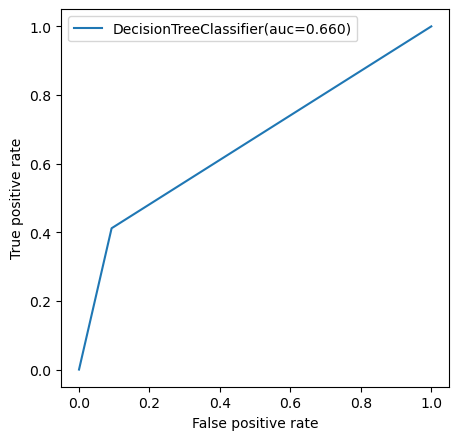

In [195]:
from sklearn.metrics import roc_curve,auc

fpr,tpr,threshold=roc_curve(y_test,pred_test)
auc=auc(fpr,tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label='DecisionTreeClassifier(auc=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

AUC score is 66%